# Project : Supplemental Kmeans

## Introduction

This is a suplemental part of the project. The idea is to implement k-means clustering for the iris data set.

KMeans is a clustering technique which tries to group features to together based on there distance from a centre point. Initially it starts with 3 random points and moves them around until the best center points are found. 

## References

https://www.datacamp.com/tutorial/k-means-clustering-python?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720821&utm_adgroupid=157156374951&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=733936221293&utm_targetid=aud-1832882613722:dsa-2218886984380&utm_loc_interest_ms=&utm_loc_physical_ms=1007877&utm_content=&accountid=9624585688&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-emea_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na&gad_source=1&gclid=Cj0KCQjwv_m-BhC4ARIsAIqNeBtcqQxamZLbu_HZzz-KqeYXnvGMhbiqEAkhefWZntcQgx3jKP1Yy2IaAuKgEALw_wcB

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


### Import the necessary libraries to support project

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


### Import Analysis project

In [84]:
import analysis as an

### Load the iris dataset

In [85]:
return_code, df_iris = an.load_data(an.config)
if return_code != 0:
    print(f"Error loading data : {return_code}")
else:
    print("Data loaded successfully")


Data loaded successfully


Import the kmeans module from sklearn

In [86]:
# Standard Scaler is used to scale the data to a common scale
from sklearn.preprocessing import StandardScaler
# PCA is used to reduce the number of features to 2 for visualization
from sklearn.decomposition import PCA
# Kmeas is used to cluster the data
from sklearn.cluster import KMeans

### Plot a scatter plot of the data  

To visualise the features , see if we can see obvious clustering

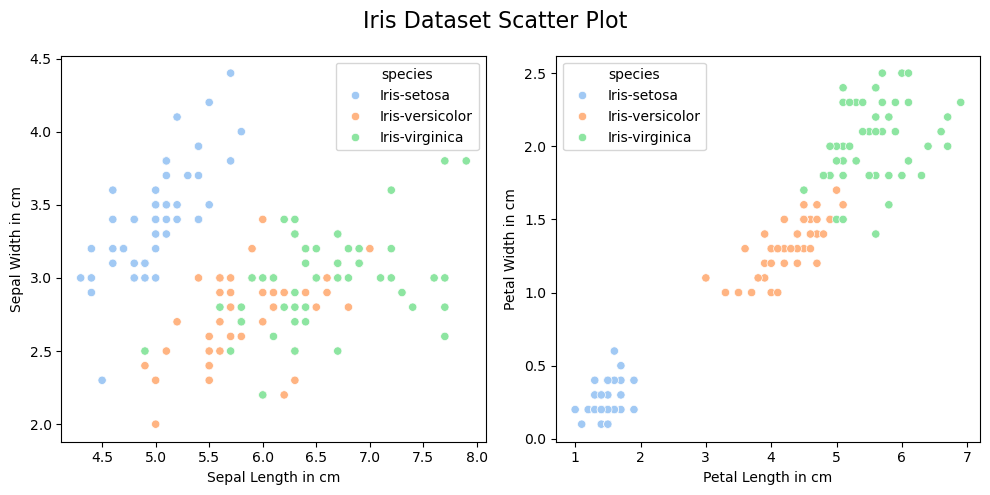

0

In [87]:
an.generate_scatter_plot(an.config, to_console=True)

Do a box Plot of the data

Again to see if we can see obvious clustering . The box plot will show if the data is distributes compactly and if there are any outliers and the potential impact on the clustering

It looks like the petals are a good feature to use for clustering but we will use RPA (random projection analysis) to see if we can find any other features that are good for clustering


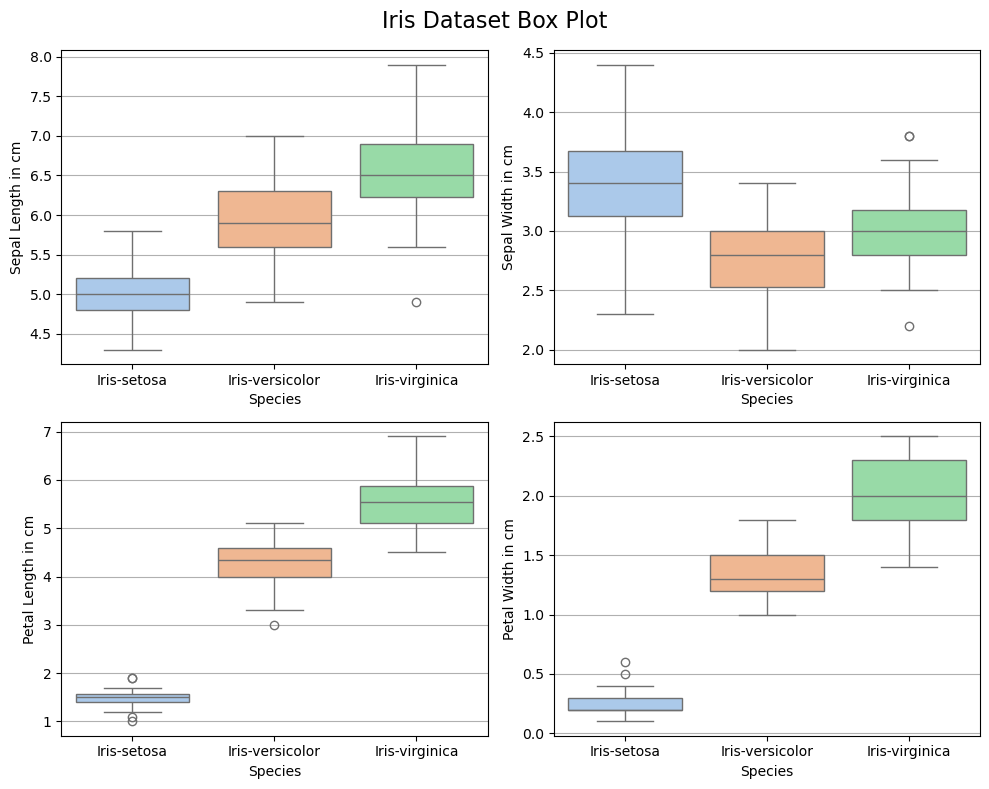

In [88]:
return_code = an.generate_box_plot(an.config, to_console=True)

### Standardize the data for kmeans

That means all features are the same scale. This prevents bias towards features with larger scales.

Bring down to the standard scale ( mean = 0, std = 1)

In [89]:
# StandardScaler is used to standardise the data
scaler = StandardScaler()
# Standardize the data
# Fit the StandardScaler to the data only  interested in the features
X = df_iris.iloc[:, :-1].values
scaler_obj = scaler.fit(X)
X_scaled = scaler.transform(X)


### Do a scatter plot and box plot of the scaled data

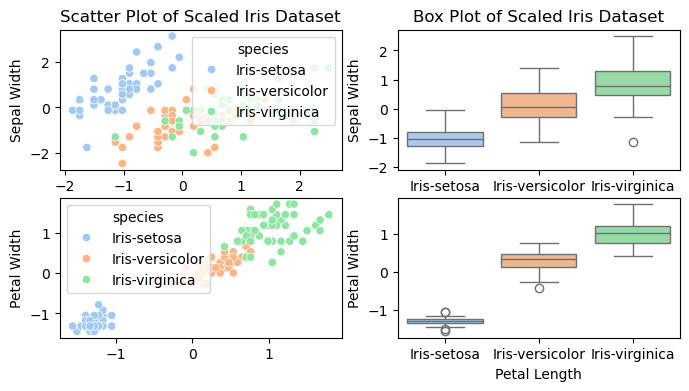

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 4))
# scatter plot of the scaled data
ax[0,0].set_title("Scatter Plot of Scaled Iris Dataset")
ax[0,1].set_xlabel("Sepal Length")
ax[0,0].set_ylabel("Sepal Width")
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_iris["species"], ax=ax[0,0])
ax[1,1].set_xlabel("Petal Length")
ax[1,0].set_ylabel("Petal Width")
sns.scatterplot(x=X_scaled[:, 2], y=X_scaled[:, 3], hue=df_iris["species"], ax=ax[1,0])


ax[0,1].set_title("Box Plot of Scaled Iris Dataset")
ax[0,1].set_xlabel("Sepal Length")
ax[0,1].set_ylabel("Sepal Width")
sns.boxplot(x="species", y=X_scaled[:, 0], data=df_iris,hue='species', ax=ax[0,1])
ax[1,1].set_xlabel("Petal Length")
ax[1,1].set_ylabel("Petal Width")
sns.boxplot(x="species", y=X_scaled[:, 2], data=df_iris,hue='species', ax=ax[1,1])
plt.show()



### Now apply RPA to reduce the data to 2D

RPA is a technique to reduce the dimensionality of the data in this case from 4D features to 2D features. 

In [ ]:
RPA = PCA(n_components=2)
X_rpa = RPA.fit_transform(X_scaled)
print(f"Explained Variance Ratio: {RPA.explained_variance_ratio_}")
df_rpa = pd.DataFrame(data=X_rpa, columns=["PC1", "PC2"])
# Add the species column to the dataframe
# the order is preserved so we can just add the species column
df_rpa["species"] = df_iris["species"]


Explained Variance Ratio: [0.72770452 0.23030523]


Plot the data in 2D   

A scatter and box plot of the data in 2D. This will show if the data is now more compact and if there are any outliers and the potential impact on the clustering

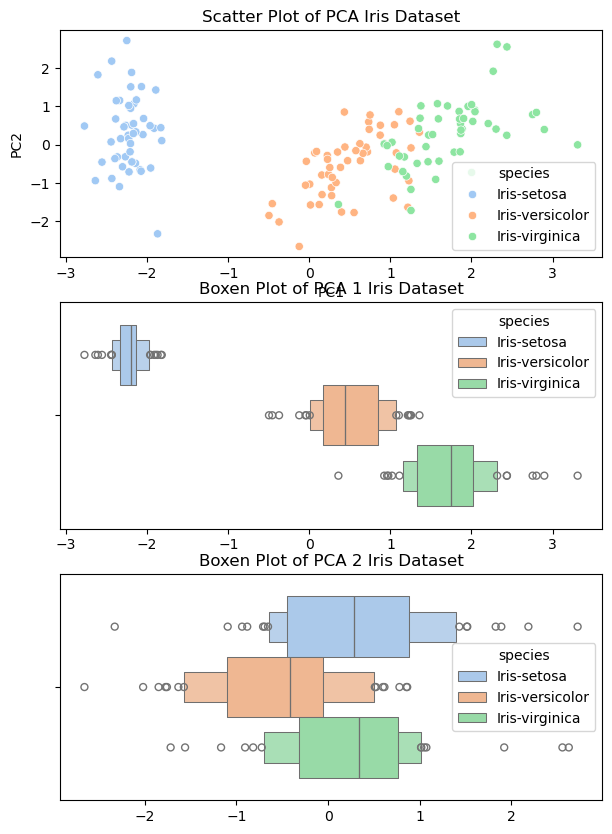

In [ ]:
fig, ax = plt.subplots(3, figsize=(7, 10))
ax[0].set_title("Scatter Plot of PCA Iris Dataset")
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
sns.scatterplot(x=X_rpa[:, 0], y=X_rpa[:, 1], hue=df_iris["species"], ax=ax[0])
# Boxen plot of the PCA data
ax[1].set_title("Boxen Plot of PCA 1 Iris Dataset")
sns.boxenplot(x=X_rpa[:, 0], hue=df_iris["species"], ax=ax[1])
# Boxen plot of the PCA data
ax[2].set_title("Boxen Plot of PCA 2 Iris Dataset")
sns.boxenplot(x=X_rpa[:, 1], hue=df_iris["species"], ax=ax[2])
plt.show()

Now apply kmeans to the data


In [93]:
kmeans = KMeans(n_clusters=3, random_state=57, n_init='auto')
# n_init is the number of times the K-means algorithm will run with different centroid seeds
# the best result is selected

kmeans.fit(X_rpa)
print(f"Cluster Centers: {kmeans.cluster_centers_}")
print(f"Inertia: {kmeans.inertia_}")
print(f"Number of Iterations: {kmeans.n_iter_}")
print(f"Features: {kmeans.n_features_in_}")
#print(f"Labels: {kmeans.labels_}")
# Add labels to dataframe , these are the cluster numbers
# the kmeans returns the cluster for species in the order of the species in the dataframe
# so we can just add the labels to the dataframe


Cluster Centers: [[-2.22019328  0.29222482]
 [ 0.61198392 -0.79925263]
 [ 1.71890108  0.65217008]]
Inertia: 116.24247259315808
Number of Iterations: 7
Features: 2


c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Plot the results of the kmean clustering

Use a scatter splot with the clusters number/species labels with colour , and the species by symbol. In adition add kde plot to show the density of the data points.

[seaborn kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.


TypeError: 'Axes' object is not subscriptable

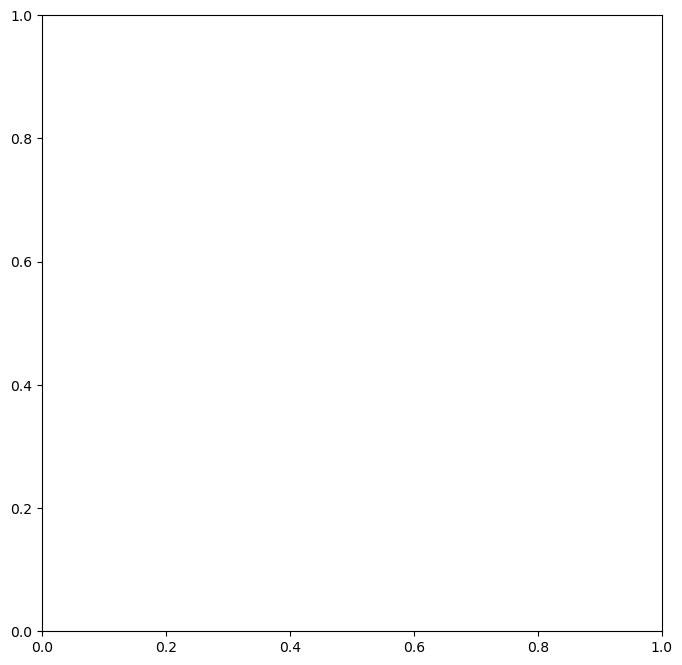

In [94]:
df_rpa["cluster"] = kmeans.labels_
fig, ax = plt.subplots(1, figsize=(8, 8))
ax[0,0].set_title("Clustered PCA Iris Dataset with K-means Clustering and species")
ax[0,0].set_xlabel("PC1")
ax[0,0].set_ylabel("PC2")
# the cluster numbers are 0,1,2 , so we can map them to the species names
cluster_map = {0: '0 - setosa', 1: '1 - versicolor', 2: '2 - virginica'}
df_rpa['cluster'] = df_rpa['cluster'].replace(cluster_map)
# plot the clusters with different colors ,and each species with different markers
# making it easier to see the clusters , and incorrectly identified species
sns.scatterplot(x=X_rpa[:, 0], y=X_rpa[:, 1], hue=df_rpa["cluster"],style=df_rpa['species'], ax=ax)
# the kmeans also returns the cluster centers , so we can put a big red dot on the center
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', ax=ax,s=200, marker='X', label='Cluster Centers')
# shade the area around the cluster centers - used this prompt to show the area around the cluster centers
# 
sns.kdeplot(x=X_rpa[:, 0], y=X_rpa[:, 1], hue=df_rpa["cluster"], fill=True, ax=ax, alpha=0.3)
plt.legend(title='Cluster', loc='upper right')
plt.show()

### Determine how the clusters identified the species based on the species name

A heatmap was used to display the count of species assigned to each cluster. The heatmap shows in graphical format the accurracy of the clustering. The setosa was the most accurate with 100% hit rate. The verginica was the worst with a hit rate of 34/50. 

Text(20.722222222222214, 0.5, 'Species')

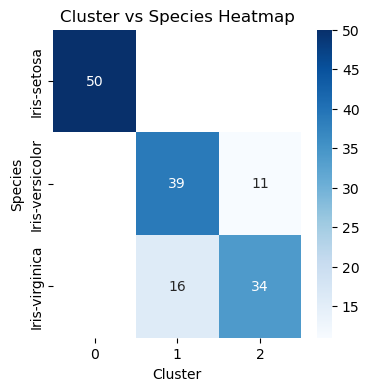

In [118]:
# Get the value counts per cluster , this how kmeans assigned clusters to speciesds
df_rpa[['species', 'cluster']].value_counts()
# plot as a heatmap - github suggested heatmap , i wanted to plot cluster vs specie
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(df_rpa[['species', 'cluster']].value_counts().unstack(), annot=True,  cmap='Blues', ax=ax)
ax.set_title("Cluster vs Species Heatmap")
plt.xlabel("Cluster")
plt.ylabel("Species")


### Determining the accurary of the clustering

There are multiple ways of working out what is the correct number of clusters. The below reference shows multiple ways of doing this. Sadly it is written in R but the approach should be the same in R

0. The number of clusters is known. In the iris data set the number of clusters is 3.
1. Empirical method. The elbow method , that is draw a plot of the number of clusters vs the inertia ( which is the sum of the square of the distance of each point to the cluster center). The elbow is the point of kink where the inertia levels off. This is the point where more clusters don't add any more infomation. It is not the best method because it is dependent on wetware ( human brain) to see the elbow.

#### Reference

- [1 - Cluster Evaluation of Iris Data Set](https://www.kaggle.com/code/meran2k/clustering-evaluation-of-iris-dataset) - Multiple ways of evaluating the clustering of the iris data set
- [Kmeans Clustering - SKLearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) - Kmeans clustering in SKLearn
- [Kmeans Clustering - Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering) - Kmeans clustering in Wikipedia
- [Kmeans Clustering - elbow vs clustering](https://towardsdatascience.com/k-means-clustering-elbow-method-using-python-4c0f1a2b3d8e) - Kmeans elbow method in python


Apply the elbow method to find the best number of clusters  

Look for th kink (inflection point) in the elbow plot , this indicates the best number of clusters

c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

Text(0.5, 1.0, 'Elbow Method')

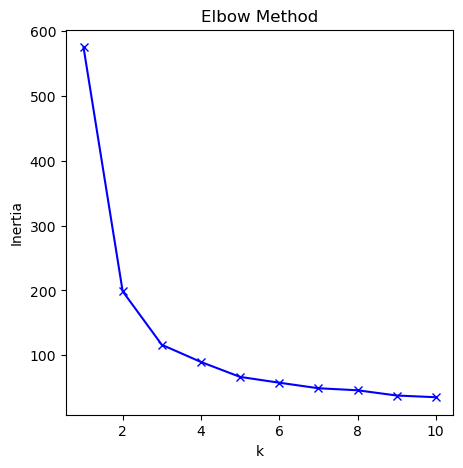

In [ ]:
K = range(1, 11) # number of clusters
inertia = [] # list to store the inertia values
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=57, n_init='auto');
    kmeans.fit(X_rpa);
    # the good thing is that kmeans returns the inertia for each cluster
    # inertia is the sum of squared distances to the closest cluster center for each sample
    inertia.append(kmeans.inertia_);
# Plot the inertia values
plt.figure(figsize=(5, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# TODO Find the place holder for kneelocation for elbow method
from kneed import KneeLocator
kneedle = KneeLocator(K, inertia, curve='convex', direction='decreasing')
kneedle.plot_knee()
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method with KneeLocator')
plt.show()


### CLuster evalution - Silhouette score

**Silhouette plot**

The pitfall documentation recommends to do a "siloette" plot to see if the data is compact and if there are any outliers and the potential impact on the clustering

In this step we will try and run a siloette plot to see what it does , this is a learning exercise to see if the data is compact and if there are any outliers and the potential impact on the clustering

We will use github copilot to help us with the code

-- Github prompts --
**What is a silhouette score?**
A silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a score close to 1 indicates that the object is well clustered, a score close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters, and a score close to -1 indicates that the object might have been assigned to the wrong cluster.7


** How is a silhouette score calculated?**
The silhouette score is calculated using the following formula:
s(i) = (b(i) - a(i)) / max(a(i), b(i))

Where:
- s(i) is the silhouette score for the i-th object
- a(i) is the average distance between the i-th object and all other objects in the same cluster
- b(i) is the average distance between the i-th object and all objects in the nearest cluster

How is the nearest cluster determined?  

The nearest cluster is determined by calculating the average distance between the i-th object and all objects in each cluster, and selecting the cluster with the smallest average distance.

Is the distance only positive?
Yes, the distance is always positive. The silhouette score can be negative if the object is closer to a different cluster than its own, but the distances used to calculate the silhouette score are always positive.

What does this really mean? ( My words)

If clusters are commplete round and distinct seperation then a(i) will approach 0 , and b(i) be positive . b(i)-a(a) very similar b(a) , thus s(i) will be close to 1.
If the clusters are percetly overlapping and round and fat , then a(i) and b(i) will be very similar , thus b(i)-a(a) will be close to 0 , and max(a(i), b(i)) will be close a(i) thus s(i) will be close to 0. Thus a horrible clustering.
If cluster b(i) is within cluster a(i) then a(i) will be tiny and b(i) will be large and max(a(i), b(i)) will be b(i) thus s(i) will be close to -1. Thus messed clustering


Google prompt - https://www.google.com/search?q=how+to+plot+a+silhouette+graph&rlz=1C1GCEA_enUS1107US1107&oq=how+to+plot+a+silloutte&gs_lcrp=EgZjaHJvbWUqCQgBECEYChigATIGCAAQRRg5MgkIARAhGAoYoAEyBggCECEYFTIHCAMQIRifBTIHCAQQIRifBTIHCAUQIRifBTIHCAYQIRifBTIHCAcQIRifBTIHCAgQIRifBTIHCAkQIRifBdIBCDgxMDNqMGo0qAIAsAIB&sourceid=chrome&ie=UTF-8


https://www.youtube.com/watch?v=_j37uExzbXk&t=58s

In [ ]:
print(df_rpa.head())
print(X_rpa[:5])
print(X_scaled[:5])

        PC1       PC2      species
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa
[[-2.26454173  0.5057039 ]
 [-2.0864255  -0.65540473]
 [-2.36795045 -0.31847731]
 [-2.30419716 -0.57536771]
 [-2.38877749  0.6747674 ]]
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


Silhouette Score: 0.40
Average Silhouette Score per Species:
           species  Silhouette Coefficient
0      Iris-setosa                0.642180
1  Iris-versicolor                0.307462
2   Iris-virginica                0.251181
Label: Iris-setosa
Label: Iris-versicolor
Label: Iris-virginica
Silhouette Score: 0.51
Average Silhouette Score per Species:
   cluster  Silhouette Coefficient
0        0                0.655932
1        1                0.426961
2        2                0.450834
Label: 0
Label: 1
Label: 2


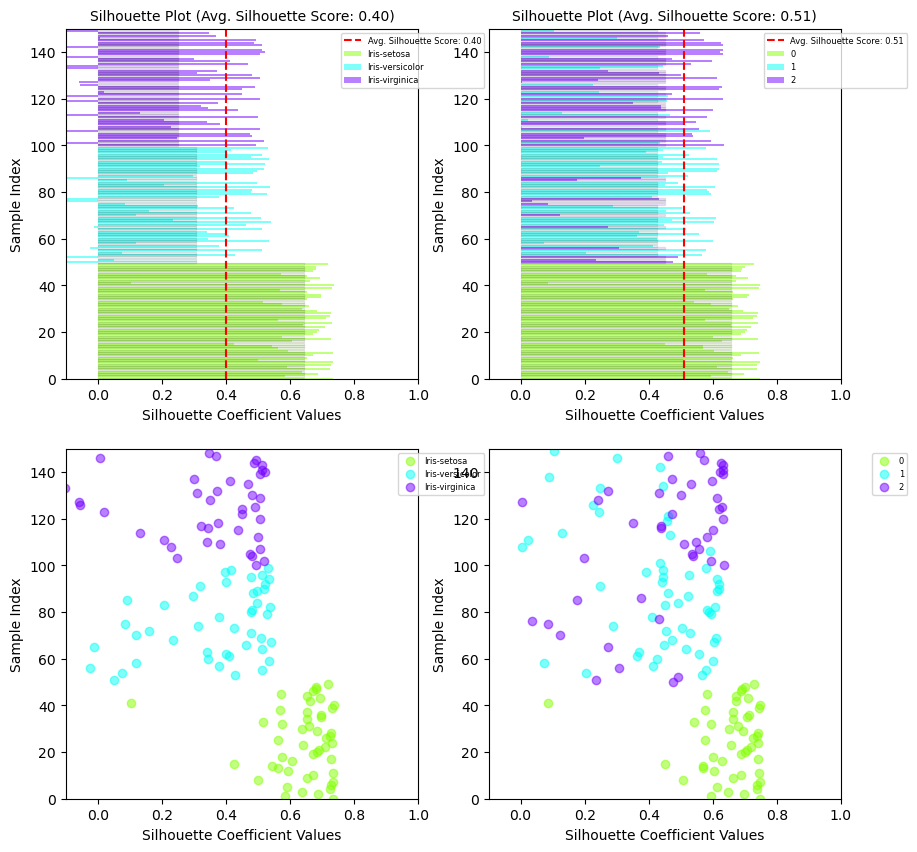

In [116]:
# Sample code from google prompt for silhouette score
# apply a sillouette score to the PCA data
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples


#---------------------------------------------------------------------------------------------
# First do silhouette score on the species data - target or correct clustering
#---------------------------------------------------------------------------------------------
# do silhouette score on the PCA data
# the first parameter is the feature data ( 2 D array of features ) and the second parameter is the species ( target )
silhouette = silhouette_score(X_rpa, df_iris["species"])
print(f"Silhouette Score: {silhouette:.2f}")

# Assuming you have your clustered data in 'X' and cluster labels in 'labels'
 # Calculate silhouette scores for each sample - for iris dataset the sample is all rows
silhouette_vals = silhouette_samples(X_rpa, df_iris["species"])
silhouette_vals_array = silhouette_vals.reshape(-1, 1)
# Create a DataFrame for the silhouette values
df_silhouette = pd.DataFrame(data=silhouette_vals_array, columns=["Silhouette Coefficient"])
# add the species column to the dataframe
df_silhouette["species"] = df_iris["species"]
# do a groupby on the species column to get the average silhouette score for each species
df_silhouette_grouped = df_silhouette.groupby("species").mean().reset_index()
print("Average Silhouette Score per Species:")
print(df_silhouette_grouped.head(10))

# Calculate the average silhouette score for the clustering
avg_silhouette_score = silhouette_score(X_rpa, df_iris["species"])

# Plot the silhouette plot
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0,0].set_xlim([-0.1, 1])
ax[0,0].set_ylim([0, len(X_rpa)])
ax[0,0].set_xlabel("Silhouette Coefficient Values")
ax[0,0].set_ylabel("Sample Index")
ax[0,0].set_title(f"Silhouette Plot (Avg. Silhouette Score: {avg_silhouette_score:.2f})", fontsize=10)


# Plot the silhouette values
# plot each sample with a different color based on its cluster label
colors = sns.color_palette("hsv", len(np.unique(df_iris["species"])))
for i, label in enumerate(np.unique(df_iris["species"])):
    print(f"Label: {label}")
    ax[0,0].barh(np.where(df_iris["species"] == label)[0], silhouette_vals[df_iris["species"] == label], color=colors[i], alpha=0.5, label=label)
    # plot the silhouette average for each cluster
    ax[0,0].barh(np.where(df_iris["species"] == label)[0], silhouette_vals[df_iris["species"] == label].mean(), color=colors[i], alpha=0.1, edgecolor='black', linewidth=1)

# Add a horizontal line for the average silhouette score
ax[0,0].axvline(avg_silhouette_score, color='red', linestyle='--', label=f"Avg. Silhouette Score: {avg_silhouette_score:.2f}")

# Add legend
ax[0,0].legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=6)

# Plot a scatter plot of the silhouette values

#ax[1,0].set_title("Silhouette Values for each Sample")
ax[1,0].set_xlabel("Silhouette Coefficient Values")
ax[1,0].set_ylabel("Sample Index")
ax[1,0].set_xlim([-0.1, 1])
ax[1,0].set_ylim([0, len(X_rpa)])
# plot each sample with a different color based on its cluster label
colors = sns.color_palette("hsv", len(np.unique(df_iris["species"])))
for i, label in enumerate(np.unique(df_iris["species"])):
    ax[1,0].scatter(silhouette_vals[df_iris["species"] == label], np.where(df_iris["species"] == label)[0], color=colors[i], alpha=0.5, label=label)
# Add legend
ax[1,0].legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=6)
#--------------------------------------------------------------------------------------------------------------------
# Now do silhouette score on the kmeans clustering data
#--------------------------------------------------------------------------------------------------------------------

# do silhouette score on the PCA data
# the first parameter is the feature data ( 2 D array of features ) and the second parameter is the species ( target )
silhouette = silhouette_score(X_rpa, df_rpa["cluster"])
print(f"Silhouette Score: {silhouette:.2f}")

# Assuming you have your clustered data in 'X' and cluster labels in 'labels'
 # Calculate silhouette scores for each sample - for iris dataset the sample is all rows
silhouette_vals = silhouette_samples(X_rpa, df_rpa["cluster"])
silhouette_vals_array = silhouette_vals.reshape(-1, 1)
# Create a DataFrame for the silhouette values
df_silhouette = pd.DataFrame(data=silhouette_vals_array, columns=["Silhouette Coefficient"])
# add the species column to the dataframe
df_silhouette["cluster"] = df_rpa["cluster"]
# do a groupby on the species column to get the average silhouette score for each species
df_silhouette_grouped = df_silhouette.groupby("cluster").mean().reset_index()
print("Average Silhouette Score per Species:")
print(df_silhouette_grouped.head(10))

# Calculate the average silhouette score for the clustering
avg_silhouette_score = silhouette_score(X_rpa, df_rpa["cluster"])

# Plot the silhouette plot

ax[0,1].set_xlim([-0.1, 1])
ax[0,1].set_ylim([0, len(X_rpa)])
ax[0,1].set_xlabel("Silhouette Coefficient Values")
ax[0,1].set_ylabel("Sample Index")
ax[0,1].set_title(f"Silhouette Plot (Avg. Silhouette Score: {avg_silhouette_score:.2f})", fontsize=10)


# Plot the silhouette values
# plot each sample with a different color based on its cluster label
colors = sns.color_palette("hsv", len(np.unique(df_rpa["cluster"])))
for i, label in enumerate(np.unique(df_rpa["cluster"])):
    print(f"Label: {label}")
    ax[0,1].barh(np.where(df_rpa["cluster"] == label)[0], silhouette_vals[df_rpa["cluster"] == label], color=colors[i], alpha=0.5, label=label)
    # plot the silhouette average for each cluster
    ax[0,1].barh(np.where(df_rpa["cluster"] == label)[0], silhouette_vals[df_rpa["cluster"] == label].mean(), color=colors[i], alpha=0.1, edgecolor='black', linewidth=1)

# Add a horizontal line for the average silhouette score
ax[0,1].axvline(avg_silhouette_score, color='red', linestyle='--', label=f"Avg. Silhouette Score: {avg_silhouette_score:.2f}")

# Add legend
ax[0,1].legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=6)

# Plot a scatter plot of the silhouette values

#ax[1,1].set_title("Silhouette Values for each Sample")
ax[1,1].set_xlabel("Silhouette Coefficient Values")
ax[1,1].set_ylabel("Sample Index")
ax[1,1].set_xlim([-0.1, 1])
ax[1,1].set_ylim([0, len(X_rpa)])
# plot each sample with a different color based on its cluster label
colors = sns.color_palette("hsv", len(np.unique(df_rpa["cluster"])))
for i, label in enumerate(np.unique(df_rpa["cluster"])):
    ax[1,1].scatter(silhouette_vals[df_rpa["cluster"] == label], np.where(df_rpa["cluster"] == label)[0], color=colors[i], alpha=0.5, label=label)
# Add legend
ax[1,1].legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=6)